Build the linear regression model using scikit learn in boston data to predict
'Price' based on other dependent variable.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression

In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [3]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
bos.columns=[ 'crim', 'zin', 'indus', 'chas', 'nox', 'rm', 'age', 'dis','rad', 'tax','ptratio','black','lstat']

bos.head()

,crim,zin,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
bos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crim       506 non-null float64
zin        506 non-null float64
indus      506 non-null float64
chas       506 non-null float64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null float64
tax        506 non-null float64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
bos.describe()

,crim,zin,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
x=bos
y =pd.DataFrame(boston.target,columns=["Price"])
print(y.shape)
print(x.shape)

(506, 1)
(506, 13)


'Price':  value of owner-occupied homes in $$1000s

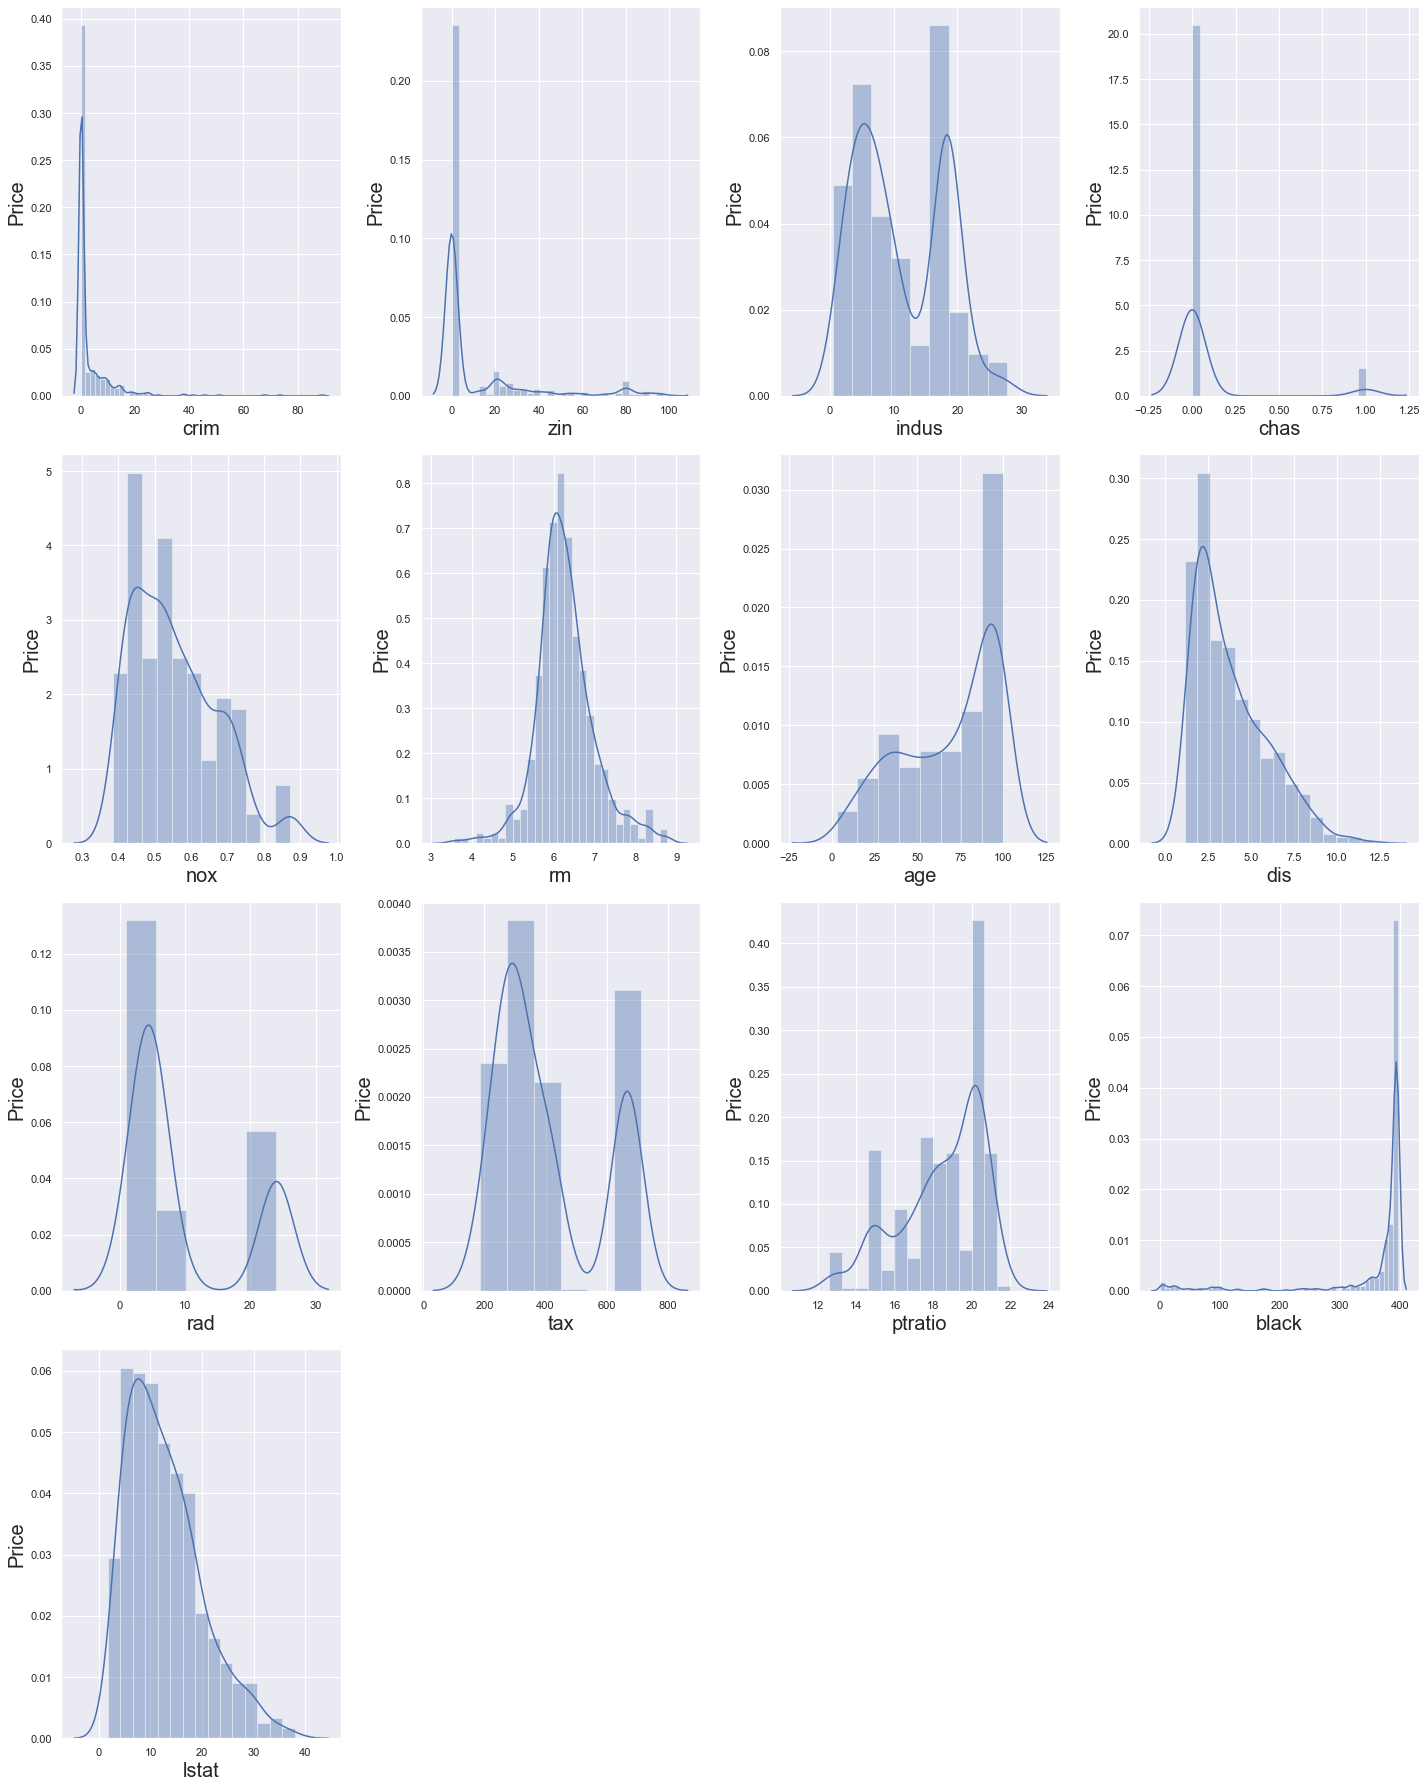

In [8]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

The data distribution looks decent enough and there doesn't seem to be any skewness. 

Let's observe the relationship between independent variables and dependent variable.

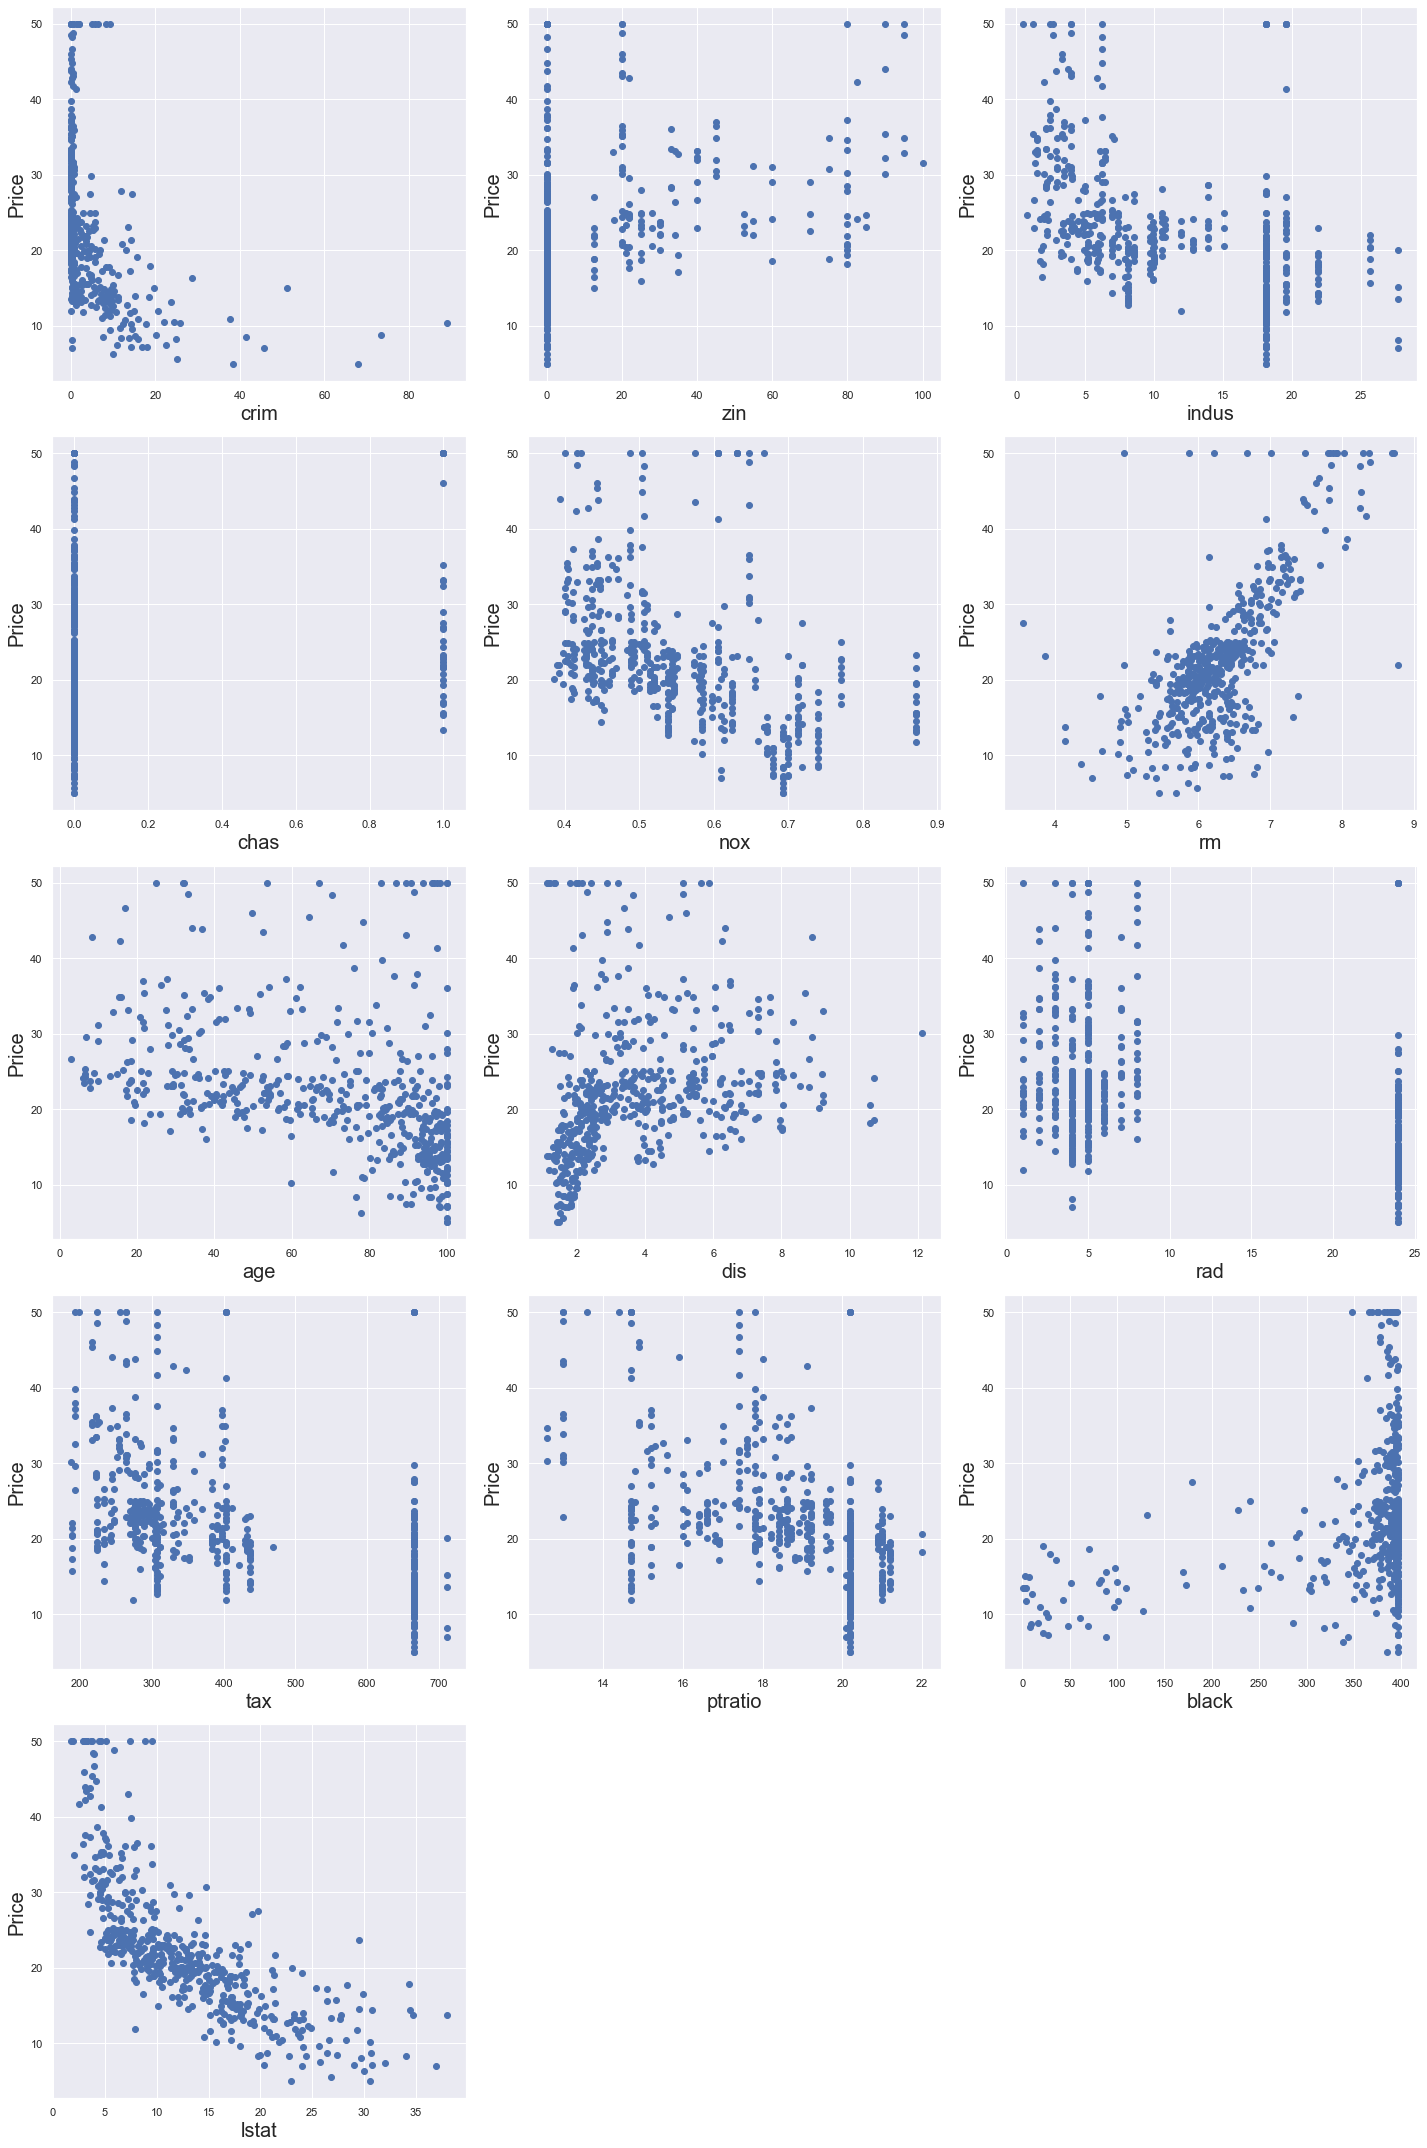

In [9]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [10]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(x)

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = x.columns

In [12]:
vif

,VIF,Features
0,1.792192,crim
1,2.298758,zin
2,3.991596,indus
3,1.073995,chas
4,4.393720,nox
5,1.933744,rm
6,3.100826,age
7,3.955945,dis
8,7.484496,rad
9,9.008554,tax


In [13]:
# dropping colume>vif(5) 
xx=x.drop(['tax','rad'],axis=1)
xx.head()

,crim,zin,indus,chas,nox,rm,age,dis,ptratio,black,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,18.7,396.90,5.33


In [14]:
X_scaledd= scaler.fit_transform(xx)
X_scaledd

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaledd,y,test_size = 0.25,random_state=55)

In [16]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
regression.score(x_train,y_train)

0.7225751100924392

In [18]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [19]:
adj_r2(x_train,y_train)

0.7142599226565178

Our r2 score is 72.25%% and adj r2 is 71.42% for our training set.

Let's check how well model fits the test data

In [20]:
regression.score(x_test,y_test)

0.7479266318029517

In [21]:
adj_r2(x_test,y_test)

0.723815266149321